In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.svm import SVR

# Indroduction

This project aims at predicting diamond price based on its features using regression models

Diamonds data set available on kaggle (https://www.kaggle.com/enashed/diamond-prices)

# Project Planning
1. Data exploration
2. Feature engineering
3. Data preprocessing for model
4. Basic model building
5. Model Tuning
6. Ensemble model building
7. Results

# Data Exploration

In [2]:
data = pd.read_csv("./diamonds_project/diamonds.csv")

In [3]:
X = data[data.columns.difference(['total_sales_price'])]
y = data["total_sales_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
X_train.head()

,clarity,color,culet_condition,culet_size,cut,date,depth_percent,diamond_id,eye_clean,fancy_color_dominant_color,...,girdle_min,lab,meas_depth,meas_length,meas_width,polish,shape,size,symmetry,table_percent
50699,SI1,G,NaN,NaN,Excellent,2022-02-24,60.4,125891198,NaN,NaN,...,NaN,GIA,2.65,4.38,4.40,Excellent,Round,0.31,Excellent,60.0
122188,IF,E,NaN,N,NaN,2022-02-24,67.2,127927351,NaN,NaN,...,NaN,GIA,2.68,5.27,3.98,Very Good,Emerald,0.50,Excellent,69.0
95117,SI2,I,NaN,NaN,NaN,2022-02-24,63.0,123825339,NaN,NaN,...,NaN,GIA,2.81,6.70,4.46,Very Good,Pear,0.50,Very Good,59.0
28977,SI2,F,NaN,N,Excellent,2022-02-24,62.4,134719178,NaN,NaN,...,NaN,GIA,2.68,4.28,4.31,Excellent,Round,0.30,Excellent,56.0
122409,VS2,I,NaN,N,Very Good,2022-02-24,60.9,135756567,Yes,NaN,...,NaN,GIA,3.09,5.05,5.09,Excellent,Round,0.50,Very Good,62.0


In [5]:
y_train.head()

50699      926
122188    2470
95117     1430
28977      802
122409    2478
Name: total_sales_price, dtype: int64

In [6]:
X_train.dtypes

clarity                         object
color                           object
culet_condition                 object
culet_size                      object
cut                             object
date                            object
depth_percent                  float64
diamond_id                       int64
eye_clean                       object
fancy_color_dominant_color      object
fancy_color_intensity           object
fancy_color_overtone            object
fancy_color_secondary_color     object
fluor_color                     object
fluor_intensity                 object
girdle_max                      object
girdle_min                      object
lab                             object
meas_depth                     float64
meas_length                    float64
meas_width                     float64
polish                          object
shape                           object
size                           float64
symmetry                        object
table_percent            

In [7]:
X_train.shape

(164778, 26)

In [8]:
X_train.columns

Index(['clarity', 'color', 'culet_condition', 'culet_size', 'cut', 'date',
       'depth_percent', 'diamond_id', 'eye_clean',
       'fancy_color_dominant_color', 'fancy_color_intensity',
       'fancy_color_overtone', 'fancy_color_secondary_color', 'fluor_color',
       'fluor_intensity', 'girdle_max', 'girdle_min', 'lab', 'meas_depth',
       'meas_length', 'meas_width', 'polish', 'shape', 'size', 'symmetry',
       'table_percent'],
      dtype='object')

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164778 entries, 50699 to 47494
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   clarity                      164778 non-null  object 
 1   color                        157905 non-null  object 
 2   culet_condition              11566 non-null   object 
 3   culet_size                   100440 non-null  object 
 4   cut                          119587 non-null  object 
 5   date                         164778 non-null  object 
 6   depth_percent                164778 non-null  float64
 7   diamond_id                   164778 non-null  int64  
 8   eye_clean                    47070 non-null   object 
 9   fancy_color_dominant_color   6875 non-null    object 
 10  fancy_color_intensity        6873 non-null    object 
 11  fancy_color_overtone         1496 non-null    object 
 12  fancy_color_secondary_color  801 non-null     object 
 

In [10]:
X_train.isnull().sum() / X_train.shape[0] * 100

clarity                         0.000000
color                           4.171067
culet_condition                92.980859
culet_size                     39.045261
cut                            27.425384
date                            0.000000
depth_percent                   0.000000
diamond_id                      0.000000
eye_clean                      71.434293
fancy_color_dominant_color     95.827720
fancy_color_intensity          95.828933
fancy_color_overtone           99.092112
fancy_color_secondary_color    99.513891
fluor_color                    92.874656
fluor_intensity                 0.056440
girdle_max                     38.329146
girdle_min                     37.924966
lab                             0.000000
meas_depth                      0.000000
meas_length                     0.000000
meas_width                      0.000000
polish                          0.000000
shape                           0.000000
size                            0.000000
symmetry        

In [11]:
nb_columns = ['size', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'total_sales_price']

In [12]:
cat_columns = ['shape', 'color', 'clarity', 'symmetry', 'polish',  'fluor_intensity', 'lab']

In [13]:
X_train.describe()

,depth_percent,diamond_id,meas_depth,meas_length,meas_width,size,table_percent
count,164778.000000,1.647780e+05,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000
mean,61.678830,1.281255e+08,3.284296,5.547437,5.137540,0.755627,57.760393
std,9.911223,1.320152e+07,2.022666,1.768683,1.380228,0.852116,9.918547
min,0.000000,9.666855e+06,0.000000,0.000000,0.000000,0.080000,0.000000
25%,61.200000,1.275645e+08,2.680000,4.350000,4.310000,0.310000,57.000000
50%,62.400000,1.326199e+08,3.030000,5.060000,4.800000,0.500000,58.000000
75%,63.500000,1.348525e+08,3.640000,6.350000,5.700000,1.000000,60.000000
max,98.700000,1.361475e+08,76.300000,93.660000,62.300000,19.350000,89.000000


In [14]:
X_train.color.unique()

array(['G', 'E', 'I', 'F', 'D', 'H', 'K', nan, 'L', 'J', 'M'],
      dtype=object)

In [15]:
X_train['shape'].unique()

array(['Round', 'Emerald', 'Pear', 'Princess', 'Oval', 'Asscher',
       'Cushion Modified', 'Heart', 'Radiant', 'Marquise', 'Cushion'],
      dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


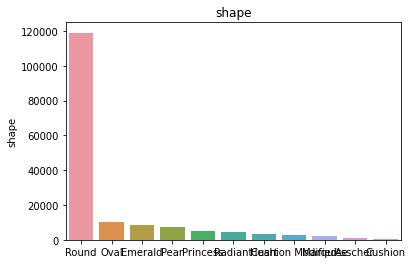

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


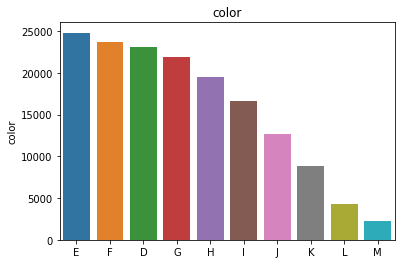

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


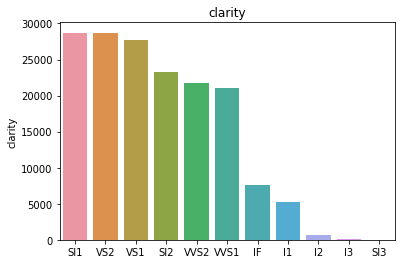

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


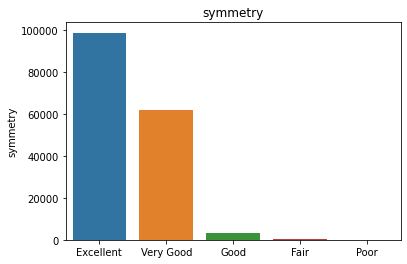

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


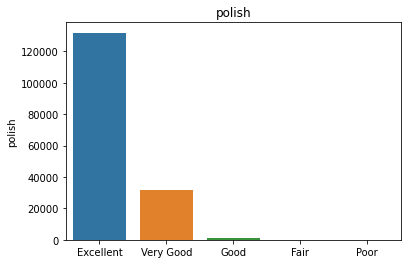

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


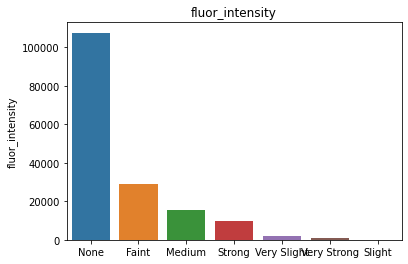

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


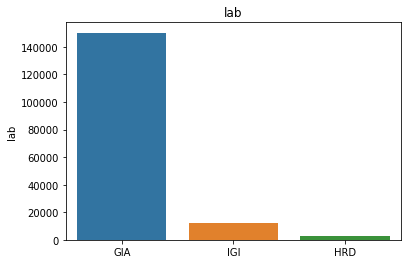

In [16]:
for name in cat_columns:
    sbn.barplot(X_train[name].value_counts().index, X_train[name].value_counts()).set_title(name)
    plt.show()

In [17]:
full_training_set = X_train.copy()
full_training_set["total_sales_price"] = y_train.copy()

full_training_set.groupby(["clarity"])['total_sales_price'].mean()

clarity
I1       5822.908987
I2       4310.971950
I3       4500.614286
IF      10629.367667
SI1      6505.400063
SI2      6623.938278
SI3       370.571429
VS1      7646.686438
VS2      7564.368467
VVS1     5698.149395
VVS2     6489.116252
Name: total_sales_price, dtype: float64

In [18]:
full_training_set.groupby(["color"])['total_sales_price'].mean()

color
D    6195.261941
E    5389.314523
F    5710.203863
G    7170.551456
H    7588.051631
I    6788.414102
J    6442.611364
K    6371.979521
L    6078.252775
M    6211.725567
Name: total_sales_price, dtype: float64

*color values are coded E been nearly colorless to M been Light Yellow color*

Refer to the link for more info https://australiandiamondimporters.com.au/colour/

In [19]:
full_training_set['date'].unique()

array(['2022-02-24'], dtype=object)

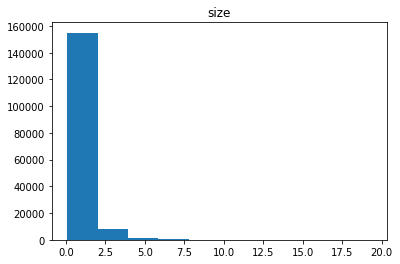

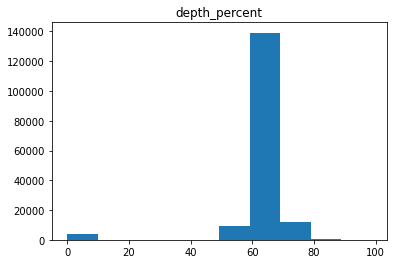

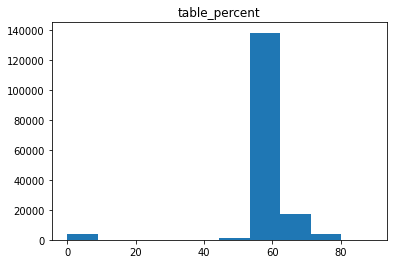

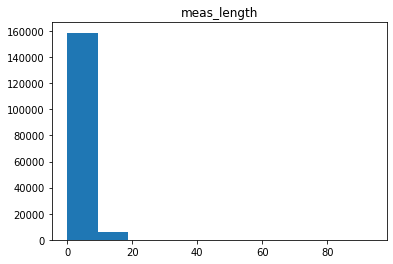

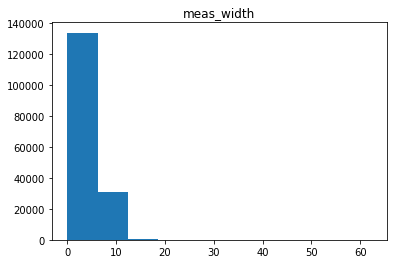

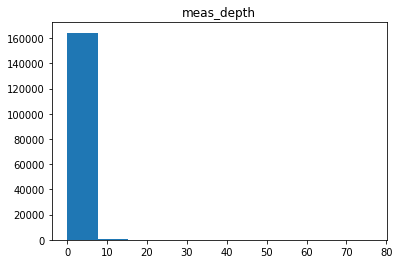

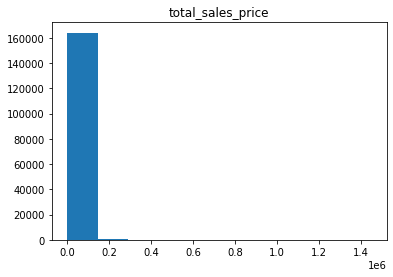

In [20]:
for name in nb_columns:
    plt.hist(full_training_set[name])
    plt.title(name)
    plt.show()

                       size  depth_percent  table_percent  meas_length  \
size               1.000000       0.062017       0.091773     0.779636   
depth_percent      0.062017       1.000000       0.669732     0.128176   
table_percent      0.091773       0.669732       1.000000     0.165657   
meas_length        0.779636       0.128176       0.165657     1.000000   
meas_width         0.785365       0.118365       0.140887     0.786358   
meas_depth         0.355965       0.086761       0.084108     0.347606   
total_sales_price  0.749895       0.024979       0.044389     0.490102   

                   meas_width  meas_depth  total_sales_price  
size                 0.785365    0.355965           0.749895  
depth_percent        0.118365    0.086761           0.024979  
table_percent        0.140887    0.084108           0.044389  
meas_length          0.786358    0.347606           0.490102  
meas_width           1.000000    0.418128           0.505597  
meas_depth           0.418128

<AxesSubplot:>

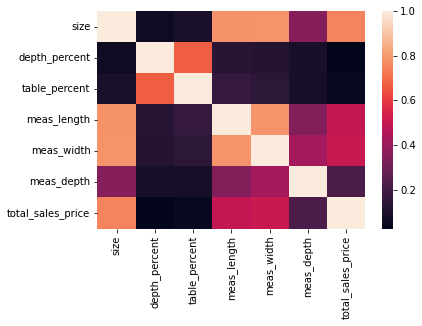

In [21]:
corr = full_training_set[nb_columns].corr()
print(corr)
sbn.heatmap(corr)

In [22]:
pd.pivot_table(full_training_set, index="color", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth", "total_sales_price"])

,depth_percent,meas_depth,meas_length,size,table_percent,total_sales_price
color,,,,,,
D,61.197640,3.092392,5.289234,0.600367,57.745990,6195.261941
E,61.544754,3.037530,5.123487,0.574536,57.763963,5389.314523
F,61.805523,3.111469,5.241354,0.621373,58.071033,5710.203863
G,61.824231,3.319616,5.549306,0.740828,57.865466,7170.551456
H,61.627288,3.418405,5.689564,0.809423,57.919779,7588.051631
I,61.569542,3.429975,5.740053,0.831267,57.727992,6788.414102
J,61.756248,3.492361,5.896071,0.898350,57.838585,6442.611364
K,61.942410,3.504421,5.924769,0.944570,57.701574,6371.979521
L,61.655204,3.594410,6.061522,1.028131,57.452444,6078.252775


In [23]:
pd.pivot_table(full_training_set, index="cut", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth", "total_sales_price"])

,depth_percent,meas_depth,meas_length,size,table_percent,total_sales_price
cut,,,,,,
Excellent,60.696981,3.202940,5.098795,0.624604,56.504449,5420.432771
Fair,62.775000,3.752500,5.955000,0.925000,61.125000,3188.000000
Good,62.959091,4.103636,7.615455,1.490455,59.136364,9201.136364
Ideal,69.800000,3.330000,6.250000,0.900000,64.000000,3767.000000
Very Good,60.787387,3.262108,5.070165,0.623444,56.295971,4045.114817


## Observations:

### Missing values
- fancy_color columns, culet_condition, fluor_color and eye_clean columns have more than 70% missing values so I will discard them for this analysis
- cut, girdle_min, girdle_max and culet_size has around 30% missing values might be removed
- fluor_intensity, color have really small missing value that need to be handled

### Feature
- Round shape diamond are dominant
- most diamonds tends to be colorless color
- prices from 200 USD -> 1.4M USD (excluding taxes)
- date has only one value feb 2022 can be discarded
- price is mostly correlated to size meas_width, meas_length
- clarity feature seems to impact the price as well

   # Feature enginnering
   

In [24]:
print(X_train.columns)
X_train_simplify = X_train.drop(columns = ["fancy_color_dominant_color", "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity", "culet_condition", "fluor_color", "eye_clean", "date", "girdle_min", "girdle_max", "culet_size", "cut"]).copy()

Index(['clarity', 'color', 'culet_condition', 'culet_size', 'cut', 'date',
       'depth_percent', 'diamond_id', 'eye_clean',
       'fancy_color_dominant_color', 'fancy_color_intensity',
       'fancy_color_overtone', 'fancy_color_secondary_color', 'fluor_color',
       'fluor_intensity', 'girdle_max', 'girdle_min', 'lab', 'meas_depth',
       'meas_length', 'meas_width', 'polish', 'shape', 'size', 'symmetry',
       'table_percent'],
      dtype='object')


In [25]:
X_train_simplify.columns

Index(['clarity', 'color', 'depth_percent', 'diamond_id', 'fluor_intensity',
       'lab', 'meas_depth', 'meas_length', 'meas_width', 'polish', 'shape',
       'size', 'symmetry', 'table_percent'],
      dtype='object')

In [26]:
X_train_simplify["is_expensive"] = y_train.apply(lambda x: 1 if x > y_train.mean() else 0)

In [27]:
X_train_simplify

,clarity,color,depth_percent,diamond_id,fluor_intensity,lab,meas_depth,meas_length,meas_width,polish,shape,size,symmetry,table_percent,is_expensive
50699,SI1,G,60.4,125891198,None,GIA,2.65,4.38,4.40,Excellent,Round,0.31,Excellent,60.0,0
122188,IF,E,67.2,127927351,None,GIA,2.68,5.27,3.98,Very Good,Emerald,0.50,Excellent,69.0,0
95117,SI2,I,63.0,123825339,Medium,GIA,2.81,6.70,4.46,Very Good,Pear,0.50,Very Good,59.0,0
28977,SI2,F,62.4,134719178,None,GIA,2.68,4.28,4.31,Excellent,Round,0.30,Excellent,56.0,0
122409,VS2,I,60.9,135756567,None,GIA,3.09,5.05,5.09,Excellent,Round,0.50,Very Good,62.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120078,SI1,H,58.8,130883016,Strong,GIA,3.06,5.19,5.20,Excellent,Round,0.50,Excellent,61.0,0
80213,VS1,E,62.9,127563961,None,GIA,2.81,4.46,4.49,Excellent,Round,0.34,Excellent,56.0,0
1576,SI2,I,0.0,115657459,None,IGI,2.68,4.21,4.23,Very Good,Round,0.30,Very Good,60.0,0
148035,VVS2,G,58.6,136026113,None,GIA,3.26,5.55,5.58,Very Good,Round,0.61,Very Good,65.0,0


In [28]:
pd.pivot_table(X_train_simplify, index="is_expensive", values=["size", "depth_percent", "table_percent", "meas_length", "meas_depth"])

,depth_percent,meas_depth,meas_length,size,table_percent
is_expensive,,,,,
0,61.370813,2.972796,4.975275,0.482083,57.311759
1,62.913357,4.532786,7.840660,1.851987,59.558516


In [29]:
X_full_train_simplify = X_train_simplify.copy()
X_full_train_simplify["total_sales_price"] = y_train.copy()

In [30]:
print(pd.pivot_table(X_full_train_simplify, index="is_expensive", columns="color", values="total_sales_price"))

color                    D             E             F             G  \
is_expensive                                                           
0              1914.462990   1746.800624   1903.416116   2130.933138   
1             28052.305094  26552.490255  25410.727818  25057.632696   

color                    H             I             J             K  \
is_expensive                                                           
0              2267.833864   2160.147696   2101.461500   1949.364208   
1             25446.920713  23984.365363  23184.206107  27031.548181   

color                    L             M  
is_expensive                              
0              2082.419103   2156.150298  
1             25654.021828  22858.552339  


In [31]:
X_train_simplify["is_big"] = X_train_simplify["size"].apply(lambda x: 1 if x > X_train_simplify["size"].mean() else 0)

In [32]:
X_full_train_simplify = X_train_simplify.copy()
X_full_train_simplify["total_sales_price"] = y_train.copy()
X_full_train_simplify.groupby(['is_big']).mean()

,depth_percent,diamond_id,meas_depth,meas_length,meas_width,size,table_percent,is_expensive,total_sales_price
is_big,,,,,,,,,
0,61.145982,1.293797e+08,2.845826,4.729967,4.509170,0.404449,57.025571,0.006656,1716.857824
1,62.907546,1.252335e+08,4.295381,7.432476,6.586523,1.565420,59.454850,0.644785,19014.321690


### Data cleaning

In [33]:
X_train_simplify.info()
X_train_simplify.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164778 entries, 50699 to 47494
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   clarity          164778 non-null  object 
 1   color            157905 non-null  object 
 2   depth_percent    164778 non-null  float64
 3   diamond_id       164778 non-null  int64  
 4   fluor_intensity  164685 non-null  object 
 5   lab              164778 non-null  object 
 6   meas_depth       164778 non-null  float64
 7   meas_length      164778 non-null  float64
 8   meas_width       164778 non-null  float64
 9   polish           164778 non-null  object 
 10  shape            164778 non-null  object 
 11  size             164778 non-null  float64
 12  symmetry         164778 non-null  object 
 13  table_percent    164778 non-null  float64
 14  is_expensive     164778 non-null  int64  
 15  is_big           164778 non-null  int64  
dtypes: float64(6), int64(3), object(7)


clarity               0
color              6873
depth_percent         0
diamond_id            0
fluor_intensity      93
lab                   0
meas_depth            0
meas_length           0
meas_width            0
polish                0
shape                 0
size                  0
symmetry              0
table_percent         0
is_expensive          0
is_big                0
dtype: int64

In [34]:
X_full_train_simplify.groupby(['color']).count()

X_train_simplify.color = X_train_simplify.color.fillna("E") #fill color with most common one

In [35]:
X_full_train_simplify = X_train_simplify.copy()
X_full_train_simplify["total_sales_price"] = y_train.copy()

X_full_train_simplify.groupby(['fluor_intensity']).count()
X_train_simplify.fluor_intensity = X_train_simplify.fluor_intensity.fillna("Faint") #fill Faint most common one

### Data preparation

<AxesSubplot:>

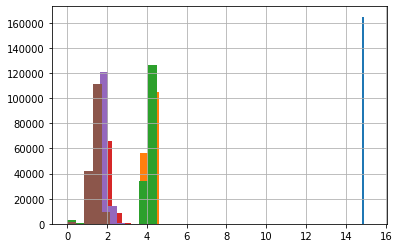

In [36]:
#normalized keeping value in a short range

#normalized log norm of size
X_train_simplify['norm_size'] =np.log(X_train_simplify.size + 1)
X_train_simplify['norm_size'].hist()

#normalized log of depth_percent
X_train_simplify["norm_depth_percent"] = np.log(X_train_simplify.depth_percent + 1)
X_train_simplify["norm_depth_percent"].hist()

#normalized log of meas_depth
X_train_simplify["norm_table_percent"] = np.log(X_train_simplify.table_percent + 1)
X_train_simplify["norm_table_percent"].hist()

#normalized log of meas_length
X_train_simplify["norm_meas_length"] = np.log(X_train_simplify.meas_length + 1)
X_train_simplify["norm_meas_length"].hist()

#normalized log of meas_width
X_train_simplify["norm_meas_width"] = np.log(X_train_simplify.meas_width + 1)
X_train_simplify["norm_meas_width"].hist()

#normalized log of meas_depth
X_train_simplify["norm_meas_depth"] = np.log(X_train_simplify.meas_depth + 1)
X_train_simplify["norm_meas_depth"].hist()


In [37]:
X_train_dummmies = pd.get_dummies(X_train_simplify[['size', 'color', 'clarity', 'symmetry', 'fluor_intensity']])

In [38]:
X_train_dummmies.head(100)

,size,color_D,color_E,color_F,color_G,color_H,color_I,color_J,color_K,color_L,...,symmetry_Good,symmetry_Poor,symmetry_Very Good,fluor_intensity_Faint,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
50699,0.31,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
122188,0.50,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
95117,0.50,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
28977,0.30,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
122409,0.50,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40670,0.30,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
44399,0.24,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
23927,0.31,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
190355,1.01,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [39]:
#scaling (keeping numeric value in normal distribution)
scale = StandardScaler()

In [40]:
X_train_dummmies_scaled = X_train_dummmies.copy()
X_train_dummmies_scaled[["size"]] = scale.fit_transform(X_train_dummmies_scaled[["size"]])
X_train_dummmies_scaled.columns

Index(['size', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H',
       'color_I', 'color_J', 'color_K', 'color_L', 'color_M', 'clarity_I1',
       'clarity_I2', 'clarity_I3', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_SI3', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'symmetry_Excellent', 'symmetry_Fair', 'symmetry_Good',
       'symmetry_Poor', 'symmetry_Very Good', 'fluor_intensity_Faint',
       'fluor_intensity_Medium', 'fluor_intensity_None',
       'fluor_intensity_Slight', 'fluor_intensity_Strong',
       'fluor_intensity_Very Slight', 'fluor_intensity_Very Strong'],
      dtype='object')

In [41]:
X_train = X_train_dummmies_scaled.copy()
X_train.describe()

,size,color_D,color_E,color_F,color_G,color_H,color_I,color_J,color_K,color_L,...,symmetry_Good,symmetry_Poor,symmetry_Very Good,fluor_intensity_Faint,fluor_intensity_Medium,fluor_intensity_None,fluor_intensity_Slight,fluor_intensity_Strong,fluor_intensity_Very Slight,fluor_intensity_Very Strong
count,1.647780e+05,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,...,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000,164778.000000
mean,1.094201e-16,0.140401,0.192271,0.143605,0.132742,0.118717,0.100960,0.077219,0.053933,0.026241,...,0.020974,0.000030,0.377071,0.175430,0.093750,0.652872,0.000049,0.060451,0.012496,0.004952
std,1.000003e+00,0.347404,0.394086,0.350690,0.339297,0.323457,0.301277,0.266940,0.225886,0.159853,...,0.143297,0.005508,0.484654,0.380336,0.291482,0.476058,0.006968,0.238321,0.111083,0.070197
min,-7.928832e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.229661e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.999911e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.867851e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.182147e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Basic model building

## Algorithms selection (regression)
1. LinearRegression
2. SGDRegressor
3. ElasticNet
4. Lasso
5. LinearSVR (Support Vector Regression)
6. SVR 

In [42]:
lr = LinearRegression()
cv = cross_val_score(lr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.57538971 0.57215504 0.57066316 0.63463999 0.57925546]
0.5864206703631906


In [43]:
sgd = SGDRegressor()
cv = cross_val_score(sgd, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.56385132 0.54127826 0.5685377  0.61771878 0.57103712]
0.5724846365432936


In [44]:
en = ElasticNet(random_state=0)
cv = cross_val_score(en, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.48754419 0.50522727 0.48379019 0.57511336 0.49066213]
0.5084674281458205


In [45]:
lasso = Lasso(alpha=0.1)
cv = cross_val_score(lasso, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.076e+12, tolerance: 8.803e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.411e+12, tolerance: 9.337e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.083e+12, tolerance: 8.864e+09

[0.57537798 0.57216912 0.57066763 0.63468307 0.57926943]
0.5864334464208002


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.160e+12, tolerance: 8.955e+09
  model = cd_fast.enet_coordinate_descent(


In [48]:
lsvr = LinearSVR(random_state=0, tol=1e-5)
cv = cross_val_score(lsvr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.35547422 0.36989649 0.35232021 0.42421357 0.3567476 ]
0.3717304195596906


In [ ]:
nusvr = NuSVR(C=1.0, nu=0.1)
cv = cross_val_score(nusvr, X_train, y_train, cv=5)
print(cv)
print(cv.mean())

In [47]:
#svr = SVR(epsilon=0.2,max_iter= 100000)
#cv = cross_val_score(svr, X_train, y_train, cv=5)
#print(cv)
#print(cv.mean())